<a href="https://colab.research.google.com/github/mkorlyakova/MSTU-courses/blob/main/ML%20magister/7/PK_14_10_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PK 14/10/22

telecom_churn

State - 51 уникальный штат в Соединенных Штатах Америки.

Account Length - Длина счета

Area Code - 415 относится к Сан-Франциско, 408 - к Сан-Хосе, а 510 - к городу Окленду

International plan - YES Указывает на наличие международного тарифа и NO Указывает на отсутствие подписки на международный тариф

Voice mail plan - YES указывает на наличие тарифа голосовой почты и NO указывает на отсутствие подписки на голосовую почту

Number vmail messages – количество сообщений vmail Количество сообщений голосовой почты от 0 до 50

Total day minutes - количество минут в день, потраченных клиентами утром

Total day calls - количество звонков, сделанных Клиентом в утренние часы

Total day charge - плата для клиентов утром

Total eve minutes - количество минут, потраченных клиентами в вечернее время

Total eve calls - количество звонков, совершенных Клиентом в вечернее время Total eve charge - Общая плата для клиентов вечером

Total night minutes - количество минут, проведенных клиентами за ночь

Total night calls - количество ночных звонков, совершенных клиентом

Total night charge - плата за ночной тариф

Total intl minutes - количество минут, потраченных клиентами на международные звонки

Total intl calls - количество международных звонков, совершенных клиентом

Total intl charge - плата на международные звонки

Customer service calls - Количество сервисных звонков

In [ ]:
# необходимые пакеты
import matplotlib.pyplot as plt
import seaborn as sns

import random 
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

# модели

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

# дополнительные части моделей
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

# metric
from sklearn.metrics import mean_absolute_error, r2_score # метрики регрессии 
# метрики для классификации
from sklearn.metrics import roc_auc_score, log_loss, precision_score,recall_score, precision_recall_curve,roc_curve, f1_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# input
DATASET_PATH = 'telecom_churn.csv'

df = pd.read_csv(DATASET_PATH, sep=',')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Предикторы - 'State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service 
       calls'**

**Целевая переменная - Churn**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
features = [  'State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']
target = 'Churn'

In [ ]:
feature_num_f = [feat for feat in features if df[feat].dtype in ['float64','float32']]
feature_num_i = [feat for feat in features if df[feat].dtype in ['int64','int32']]
feature_num_f,feature_num_i

(['Total day minutes',
  'Total day charge',
  'Total eve minutes',
  'Total eve charge',
  'Total night minutes',
  'Total night charge',
  'Total intl minutes',
  'Total intl charge'],
 ['Account length',
  'Area code',
  'Number vmail messages',
  'Total day calls',
  'Total eve calls',
  'Total night calls',
  'Total intl calls',
  'Customer service calls'])

**Распределение числовых признаков:**

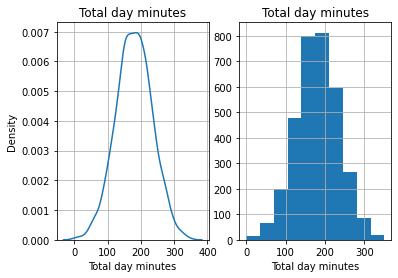

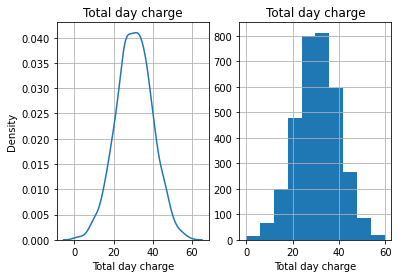

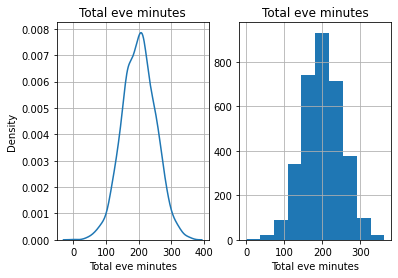

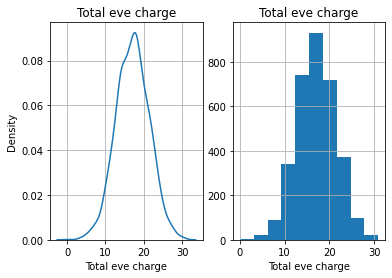

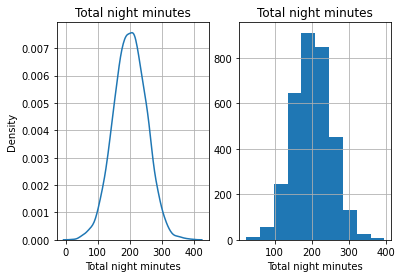

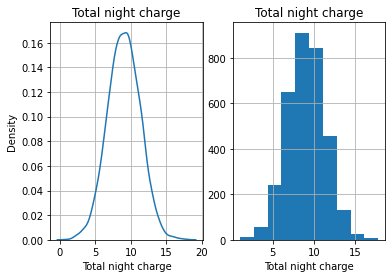

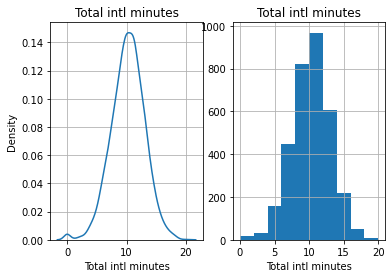

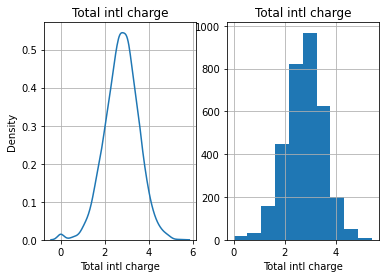

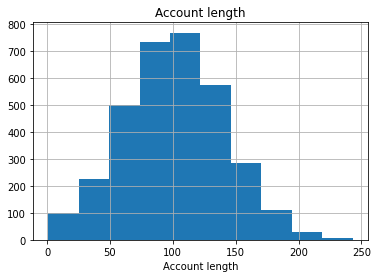

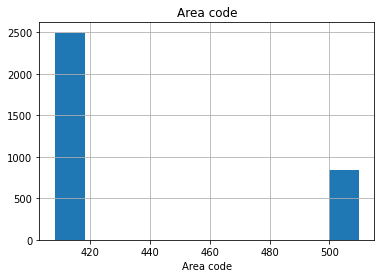

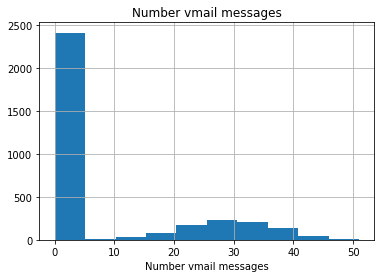

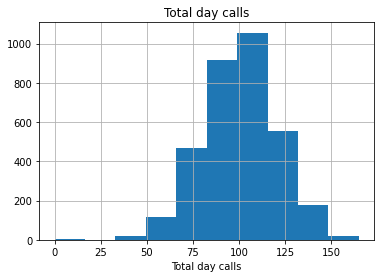

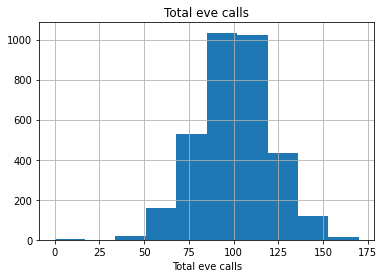

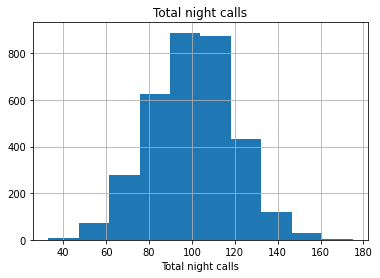

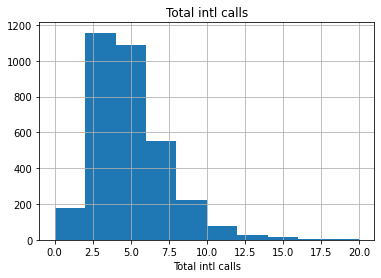

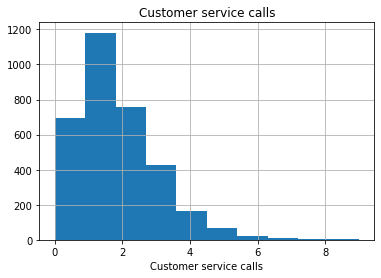

In [ ]:
for name in feature_num_f:
    try:
        plt.subplot(1,2,1)
        sns.kdeplot(df[name])
        plt.grid()
        plt.title(name)
        plt.xlabel(name)
        plt.subplot(1,2,2)
        plt.hist(df[name])
        plt.grid()
        plt.title(name)
        plt.xlabel(name)
        plt.show()
    except:
        print('для ',name,' ошибка работы')

for name in feature_num_i:
    try:
        plt.hist(df[name])
        plt.grid()
        plt.title(name)
        plt.xlabel(name)
        plt.show()
    except:
        print('для ',name,' ошибка работы')        

**Вывод: Area code категорийный признак. Остальные графики удовлетворяют требованиям**

In [ ]:
feature_cat = [feat for feat in features if df[feat].dtype not in ['int64','float64']]+['Area code','International plan', 'Voice mail plan']
feature_cat

['State',
 'International plan',
 'Voice mail plan',
 'Area code',
 'International plan',
 'Voice mail plan']

In [ ]:
feature_num = ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']
feature_num

['Account length',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

**Определение числа признаков:**

In [ ]:
for name in feature_cat:
    print( name,': число категорий: ' ,len(df.loc[:, name].unique()))

State : число категорий:  51
International plan : число категорий:  2
Voice mail plan : число категорий:  2
Area code : число категорий:  3
International plan : число категорий:  2
Voice mail plan : число категорий:  2


In [ ]:
for name in feature_cat:
    print('признак ',name,':')
    print(df.loc[:, name ].value_counts())

признак  State :
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64
признак  International plan :
No     3010
Yes     323
Name: International plan, dtype: int64
признак  Voice mail plan :
No     2411
Yes     922
Name: Voice mail plan, dtype: int64
признак  Area code :
415    1655
510     840
408     838
Name: Area code, dtype: int64
признак  International plan :
No     3010
Yes     323
Name: International plan, dtype: int64
признак  Voice mail plan :
No     2411
Yes     922
Name: Voice mail plan, dtype: int64


**Признаку State соответствуют два числовых признаков - широта и долгота. Вывод: действий с категорийными признаками не требуется**

**Разделим данные на тестовые и тренировочные**

In [ ]:
#разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], random_state=0)

(2499, 1)
(2499, 1)
(2499, 1)
(2499, 1)
(2499, 1)
(2499, 1)
(2499, 1)
(2499, 1)
(2499, 1)
(2499, 1)
(2499, 1)
(2499, 1)
(2499, 1)
(2499, 1)
(2499, 1)


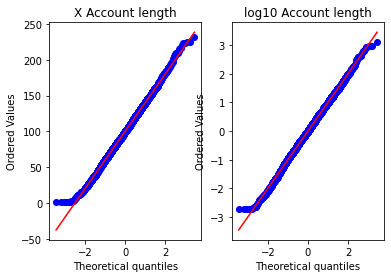

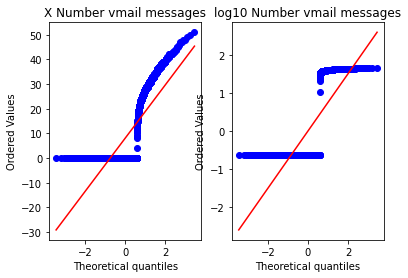

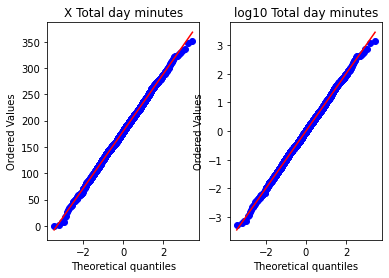

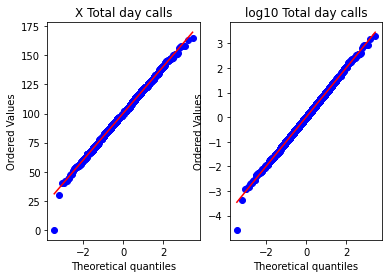

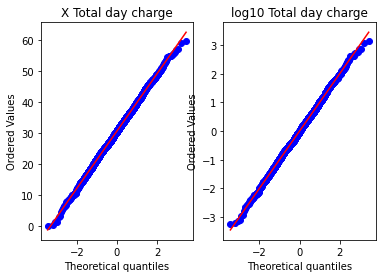

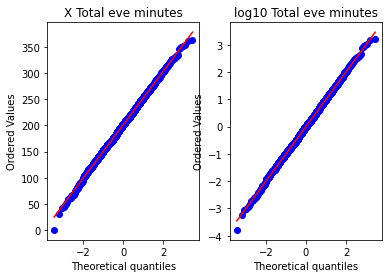

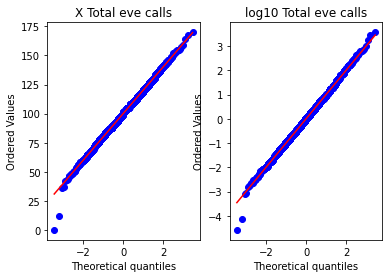

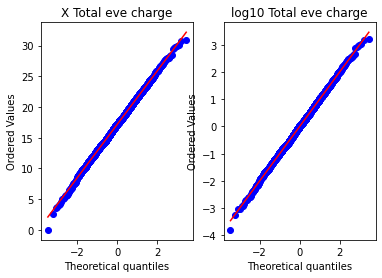

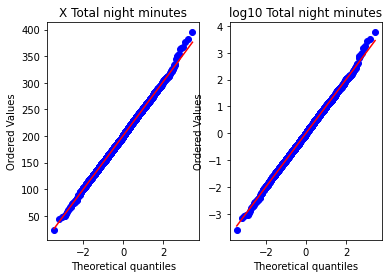

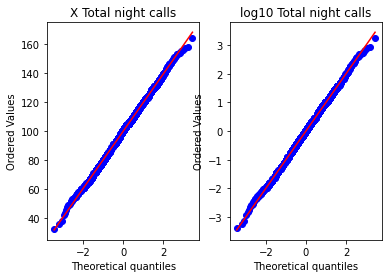

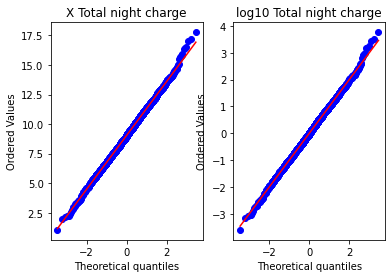

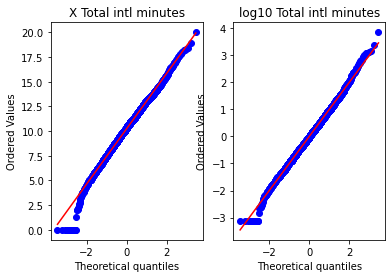

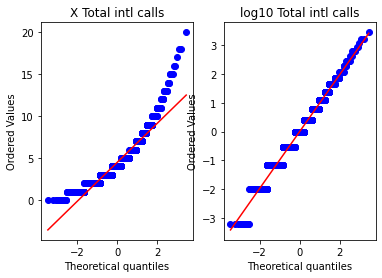

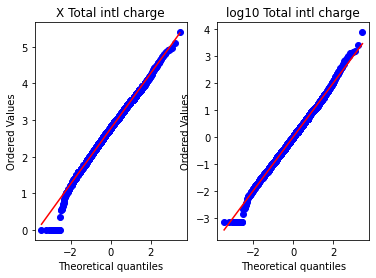

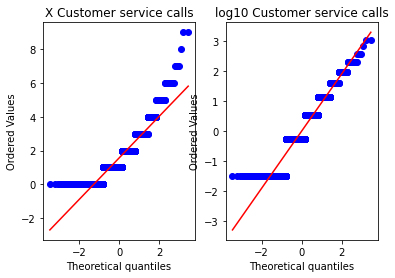

In [ ]:
from scipy import stats
from sklearn.preprocessing import PowerTransformer

for name in feature_num:
    try:
        vPower = PowerTransformer().fit(X_train[name].values.reshape(-1,1)+1)
        yv = vPower.transform(X_train[name].values.reshape(-1,1)+1)
        print(yv.shape)
        fig1, (ax1, ax2) = plt.subplots(1,2)
        p1 = stats.probplot(X_train[name], dist=stats.norm, plot=ax1)
        p2 = stats.probplot(yv[:,0], dist=stats.norm, plot=ax2)
        ax1.set_title('X '+name)
        ax2.set_title('log10 '+name)

    except:
        print('для ',name,' ошибка работы')

**Вывод: данные Number vmail messages не нормальны.**

In [ ]:
X1 =X_train.loc[y_train == 1, :]
X0 =X_train.loc[y_train == 0, :]

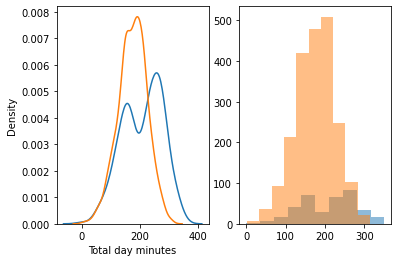

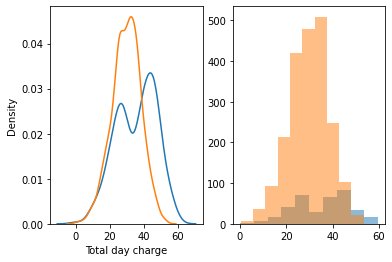

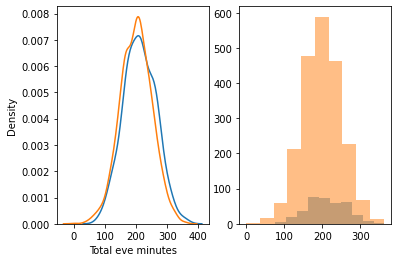

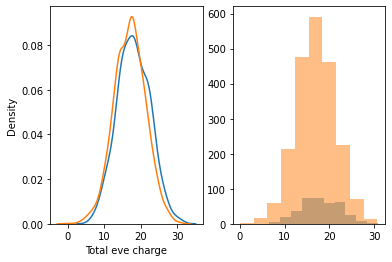

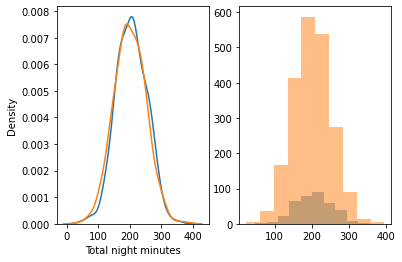

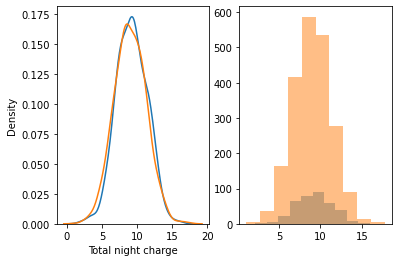

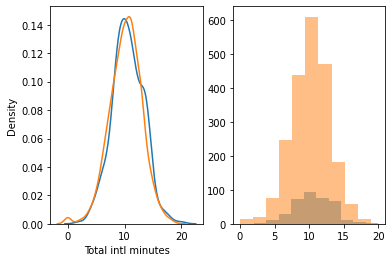

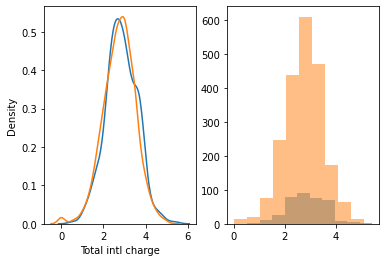

In [ ]:
for name in feature_num_f:
    try:
        plt.subplot(1,2,1)
        sns.kdeplot(X1[name])
        sns.kdeplot(X0[name])
        plt.subplot(1,2,2)
        plt.hist(X1[name], alpha = 0.5)
        plt.hist(X0[name], alpha = 0.5)
        plt.show()
    except:
        print('для ',name,' ошибка работы')

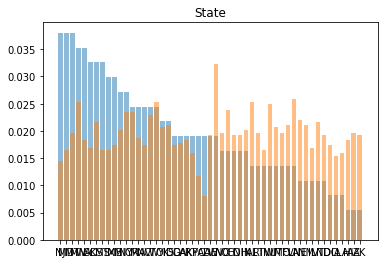

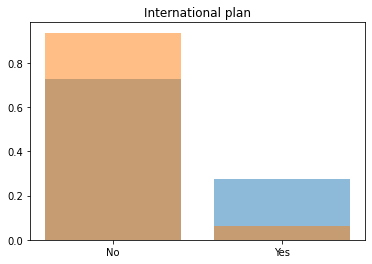

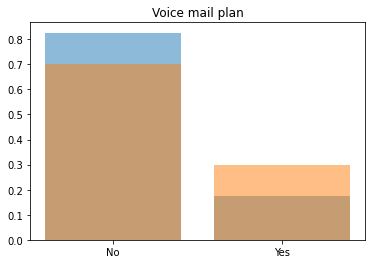

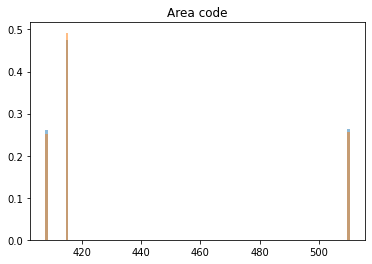

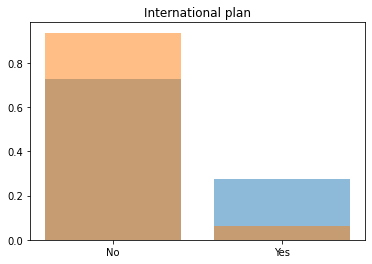

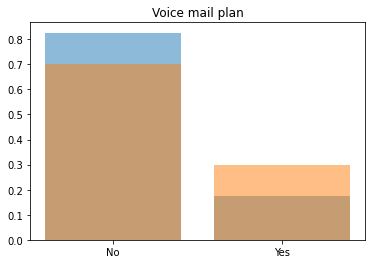

In [ ]:
for name in feature_cat:
    try:
        b1 = X1[name].value_counts(normalize=True)
        b0 = X0[name].value_counts(normalize=True)
        plt.bar(b1.index,b1.values, alpha=0.5)
        plt.bar(b0.index,b0.values, alpha=0.5)
        plt.title(name)
        plt.show()
    except:
        print('для ',name,' ошибка работы')

**Вывод: данные сбалансированы, действий не требуется**

# Создание модели

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class preprocess_data(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self):
        
        self.median_age = 0
        self.AgePower = PowerTransformer()
        self.SPower = PowerTransformer()
        self.FPower = PowerTransformer()
        self.cat = []

        
          
    def fit(self, X, y=None):
        self.cat = [feat for feat in X.columns if X[feat].dtype not in ['int64','float64']]# + ['Area code','International plan', 'Voice mail plan']
        #feature_num = ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls','latitude', 'longitude']
        X.loc[:, self.cat] = X.loc[:, self.cat].astype(str)

        return self

    def transform(self, X):
        X.loc[:, self.cat] = X.loc[:, self.cat].astype(str)
       
        
        X['Account length']=self.AgePower.transform(X['Account length'].values.reshape(-1,1)+1)
        X['Number vmail messages'] = self.SPower.transform(X['Number vmail messages'].values.reshape(-1,1)+1)
        X['Total day minutes'] = self.FPower.transform(X['Total day minutes'].values.reshape(-1,1)+1)
        X['Total day calls']=self.AgePower.transform(X['Total day calls'].values.reshape(-1,1)+1)
        X['Total day charge'] = self.SPower.transform(X['Total day charge'].values.reshape(-1,1)+1)
        X['Total eve minutes'] = self.FPower.transform(X['Total eve minutes'].values.reshape(-1,1)+1)
        X['Total eve calls']=self.AgePower.transform(X['Total eve calls'].values.reshape(-1,1)+1)
        X['Total eve charge'] = self.SPower.transform(X['Total eve charge'].values.reshape(-1,1)+1)
        X['Total night minutes'] = self.FPower.transform(X['Total night minutes'].values.reshape(-1,1)+1)
        X['Total night calls']=self.AgePower.transform(X['Total night calls'].values.reshape(-1,1)+1)
        X['Total night charge'] = self.SPower.transform(X['Total night charge'].values.reshape(-1,1)+1)
        X['Total intl minutes'] = self.FPower.transform(X['Total intl minutes'].values.reshape(-1,1)+1)
        
        X['Total intl calls']=self.AgePower.transform(X['Total intl calls'].values.reshape(-1,1)+1)
        X['Total intl charge'] = self.SPower.transform(X['Total intl charge'].values.reshape(-1,1)+1)
        X['Customer service calls'] = self.FPower.transform(X['Customer service calls'].values.reshape(-1,1)+1)
        X['latitude']=self.AgePower.transform(X['latitude'].values.reshape(-1,1)+1)
        X['longitude'] = self.SPower.transform(X['longitude'].values.reshape(-1,1)+1)
        self.median_age = X[imputer_list[0]].median()
       
  
        
        return X

**Удалим из тестовых и тренировочных данных признаки State, International plan и Voice mail plan для удобства**

In [ ]:
X_train.drop('State',axis=1,inplace=True)
X_test.drop('State',axis=1,inplace=True)

X_train.drop('International plan',axis=1,inplace=True)
X_test.drop('International plan',axis=1,inplace=True)

X_train.drop('Voice mail plan',axis=1,inplace=True)
X_test.drop('Voice mail plan',axis=1,inplace=True)

**В качестве моделей выбираем случайный лес, градиентный бустинг, ближайший сосед и логистическую регрессию**

In [ ]:
RF =  RandomForestClassifier()
GB = GradientBoostingClassifier()
KNN = KNeighborsClassifier()
LM = LogisticRegression()
SV = SVC(gamma='auto',probability=True)
cls_= ['RF','GB','KNN','LM','SV']

list_class = {"cls":[RF,GB,KNN,LM,SV],'metric':[0,0,0,0,0]}

Произведём селекцию моделей

RF : : 0.8535344983975328
GB : : 0.8492229545866843
KNN : : 0.6248110298119369
LM : : 0.7046985547560016
SV : : 0.4977021225131522


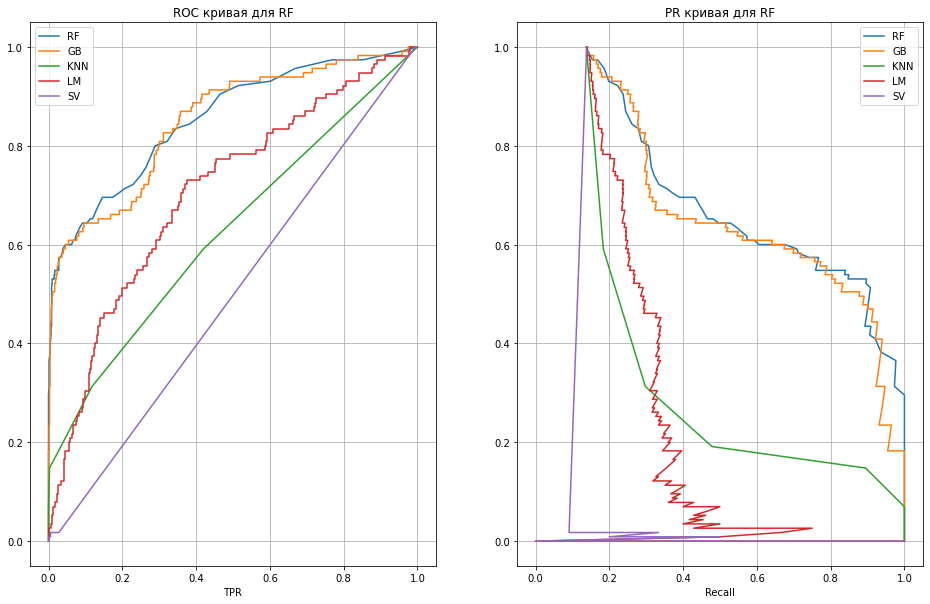

In [ ]:
plt.figure(figsize =(16,10))
for i,model in enumerate(list_class["cls"]):
    yp = model.fit(X_train,y_train).predict_proba(X_test)[:,1]
    list_class['metric'][i] = roc_auc_score(y_test,yp)
    p,r,t = roc_curve(y_test,yp)
    plt.subplot(1,2,1)
    plt.plot(p,r,label = cls_[i])
    p,r,t = precision_recall_curve(y_test,yp)
    plt.subplot(1,2,2)
    plt.plot(p,r,label = cls_[i])
    print(cls_[i],": :",list_class['metric'][i]) 
plt.subplot(1,2,1)    
plt.title('ROC кривая для RF')
plt.grid(True)
plt.xlabel('FPR')
plt.xlabel('TPR')
plt.legend()
plt.subplot(1,2,2)    
plt.title('PR кривая для RF')
plt.grid(True)
plt.xlabel('Precision')
plt.xlabel('Recall')
plt.legend()
plt.show()
    
    

**Лушей моделью оказался случайный лес**

**Показатели градиентного бустинга оказались близки к модели случайномого леса, а ближайший сосед и логистическая регрессия имеют плохие показатели**

**Вывод: в результате была выбрана модель случайного леса**

In [ ]:
RFC = RandomForestClassifier(n_estimators=37, random_state=241)
RFC.fit(X_train, y_train)

RandomForestClassifier(n_estimators=37, random_state=241)

In [ ]:
RFC.score(X_test, y_test)

0.9184652278177458

In [ ]:
#from sklearn.metrics import roc_curve, auc, roc_auc_score

rez = np.zeros((10,10))

for i,n_tree in enumerate(np.linspace(1,500,10)): # варианты числа деревьев
    for j,deep_tree in enumerate(np.linspace(1,10,10)): # варианты глубины деревьев
        RF =  RandomForestClassifier(max_depth=int(deep_tree),n_estimators=int(n_tree))
        yp = RF.fit(X_train,y_train).predict_proba(X_test)[:,1]
        
        #rez[i,j] = auc(y_test, yp)
        rez[i,j] = roc_auc_score(y_test,yp) # сохраняем метрику на отложенной выборке
        del RF
        

**Построим визуалицию нашей модели**

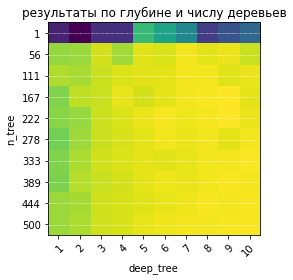

In [ ]:
N_tree = 500
Deep_tree = 10

def plot_rez(rez,xlabel,ylabel,title,xyl = [[1,N_tree],[1,Deep_tree]]):
    
    fig, ax = plt.subplots()
    
    im = ax.imshow(rez)
    n = rez.shape
    # We want to show all ticks...
    ax.set_xticks(np.arange(n[1]))
    ax.set_yticks(np.arange(n[0]))
        
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # ... and label them with the respective list entries
    ax.set_yticklabels(np.linspace(xyl[0][0],xyl[0][1],n[0]).astype(int))
    ax.set_xticklabels(np.linspace(xyl[1][0],xyl[1][1],n[1]).astype(int))

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(n[0]):
        for j in range(n[1]):
            text = ax.text(j, i, rez[i, j],
                           ha="center", va="center", color="w",size=2)

    ax.set_title("результаты по глубине и числу деревьев")
    fig.tight_layout()
    
    plt.show()

plot_rez(rez,'deep_tree','n_tree','ROC_AUC от числа деревьев и их глубины',xyl = [[1,500],[1,10]]) 


**По данному графику можем наблюдать, что нам достаточно менее 56 деревьев с глубиной 10**

Создадим объект sklearn, который добавит  полиномиальные признаки

In [ ]:
RF =  RandomForestClassifier(max_depth=int(deep_tree),n_estimators=int(n_tree))
yp = RF.fit(X_train,y_train).predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,yp))

0.8552941887887767


In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
                            

In [ ]:
X_poly.shape

(2499, 153)

In [ ]:
RF =  RandomForestClassifier(max_depth=int(deep_tree),n_estimators=int(n_tree))
yp = RF.fit(X_poly,y_train).predict_proba(X_poly_test)[:,1]
print(roc_auc_score(y_test,yp))

0.8606034951925985


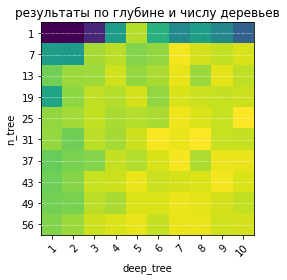

In [ ]:
#from sklearn.metrics import roc_curve, auc, roc_auc_score

rez = np.zeros((10,10))

for i,n_tree in enumerate(np.linspace(1,56,10)): # варианты числа деревьев
    for j,deep_tree in enumerate(np.linspace(1,10,10)): # варианты глубины деревьев
        RF =  RandomForestClassifier(max_depth=int(deep_tree),n_estimators=int(n_tree))
        yp = RF.fit(X_train,y_train).predict_proba(X_test)[:,1]
        
        #rez[i,j] = auc(y_test, yp)
        rez[i,j] = roc_auc_score(y_test,yp) # сохраняем метрику на отложенной выборке
        del RF

plot_rez(rez,'deep_tree','n_tree','ROC_AUC от числа деревьев и их глубины',xyl = [[1,56],[1,10]]) 
      

**Произведём калибровку модели**

0.462245711000662


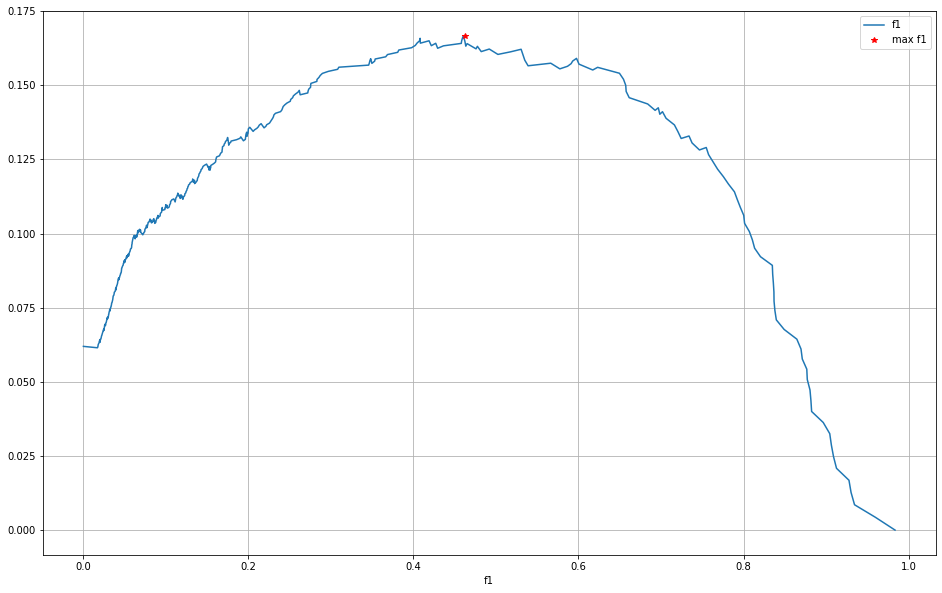

In [ ]:
p,r,t = precision_recall_curve(y_test,yp)

f1 = p*r/2/(p+r)

ind_tr = np.argmax(f1)
print(t[ind_tr])

plt.figure(figsize =(16,10))
plt.plot([0]+t.tolist(),f1, label = 'f1')
plt.plot(t[ind_tr],f1[ind_tr],'*r', label = 'max f1')
plt.xlabel('treshold')
plt.xlabel('f1')
plt.legend()
plt.grid(True)
plt.show()



Выводы:

  - причины выбора модели
  - качество данных : с пробелами, с выбросами, катекорийные/дискретные/непрерывные
  - результаты моделирования и.т.п.